In [18]:
%load_ext autoreload
%autoreload 2
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

MPL_CUSTOM = {
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.dpi': 120,
    'figure.figsize': (4, 3.5),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
}

for k, v in MPL_CUSTOM.items():
    mpl.rcParams[k] = v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
project_dir = Path(os.environ['CONDA_PREFIX']).parent.absolute()
current_dir = project_dir / 'scratch/ana/result/kyotoRate'

In [20]:
files = sorted(list(current_dir.glob('data*.txt')))
df_list = [
    pd.read_csv(str(f), sep=r'\s+', header=None, names=['Mch', 'count', 'P(Mch>=x)']) for f in files
]

df_multi_list = [
    pd.DataFrame({
        'x': df['Mch'],
        'y': df['count'],
    }) for df in df_list
]

df_centrality_list = [
    pd.DataFrame({
        'x': df['Mch'],
        'y': df['P(Mch>=x)'],
    }) for df in df_list
]

run_ids = [int(re.findall(r'data(\d+).txt', str(f))[0]) for f in files]


In [21]:
for i in range(len(df_centrality_list)):
    df_centrality_list[i] = df_centrality_list[i].query('x >= 1')
    df_centrality_list[i].x = df_centrality_list[i]['x'] - 0.5



for i in range(len(df_multi_list)):
    print(df_multi_list[i]) 

print([sum(y) for y in zip(*df_multi_list['y'])])
#print(df_multi_list.sum('y'))    

       x      y
0    0.5      9
1    1.5  43625
2    2.5  24835
3    3.5  26025
4    4.5  15629
5    5.5  10286
6    6.5   7719
7    7.5   5439
8    8.5   4070
9    9.5   3067
10  10.5   2254
11  11.5   1759
12  12.5   1419
13  13.5   1047
14  14.5    802
15  15.5    698
16  16.5    517
17  17.5    383
18  18.5    271
19  19.5    214
20  20.5    141
21  21.5     99
22  22.5     68
23  23.5     40
24  24.5     28
25  25.5     13
26  26.5     10
27  27.5     10
28  28.5      3
29  29.5      1
30  30.5      2
31  31.5      1
32  32.5      0
33  33.5      1
       x      y
0    0.5      6
1    1.5  35501
2    2.5  20637
3    3.5  21341
4    4.5  12806
5    5.5   8530
6    6.5   6400
7    7.5   4649
8    8.5   3143
9    9.5   2451
10  10.5   1886
11  11.5   1461
12  12.5   1058
13  13.5    892
14  14.5    681
15  15.5    521
16  16.5    431
17  17.5    308
18  18.5    237
19  19.5    176
20  20.5    132
21  21.5     84
22  22.5     51
23  23.5     30
24  24.5     24
25  25.5     11
26  26.5

TypeError: list indices must be integers or slices, not str

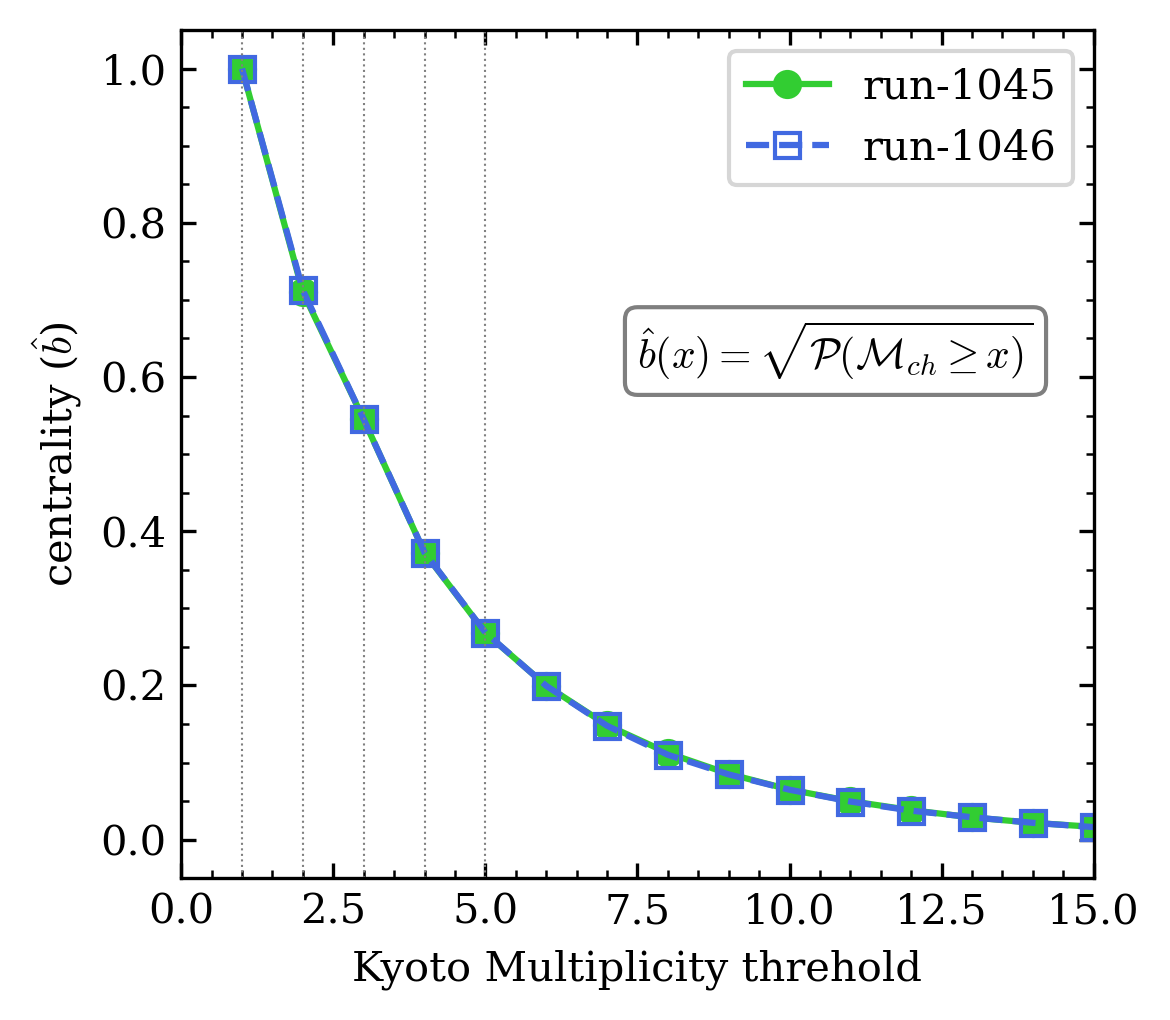

In [ ]:
colors = ['limegreen', 'royalblue']
linestyles = ['-', '--']
markers = ['o', 's']
labels = [f'run-{idx}' for idx in run_ids]
mfcs = [None, 'none']

fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
for i in range(len(df_centrality_list)):
    ax.plot(
        df_centrality_list[i].x, df_centrality_list[i].y, 
        marker=markers[i], color=colors[i], label=labels[i],
        linestyle=linestyles[i], markerfacecolor=mfcs[i]
    )

ax.set_xlim(0, 15)

for x in df_centrality_list[0].x.values[:5]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)

ax.legend()
ax.set_xlabel('Kyoto Multiplicity threhold')
ax.set_ylabel(r'centrality ($\hat{b}$)')

ax.annotate(
    r'$\hat{b}(x) = \sqrt{\mathcal{P}(\mathcal{M}_{ch} \geq x)} $',
    xy=(0.5, 0.5), xycoords='axes fraction',
    xytext=(0.5, 0.6), textcoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
)

fig.tight_layout()
plt.show()

(0.0, 25.0)

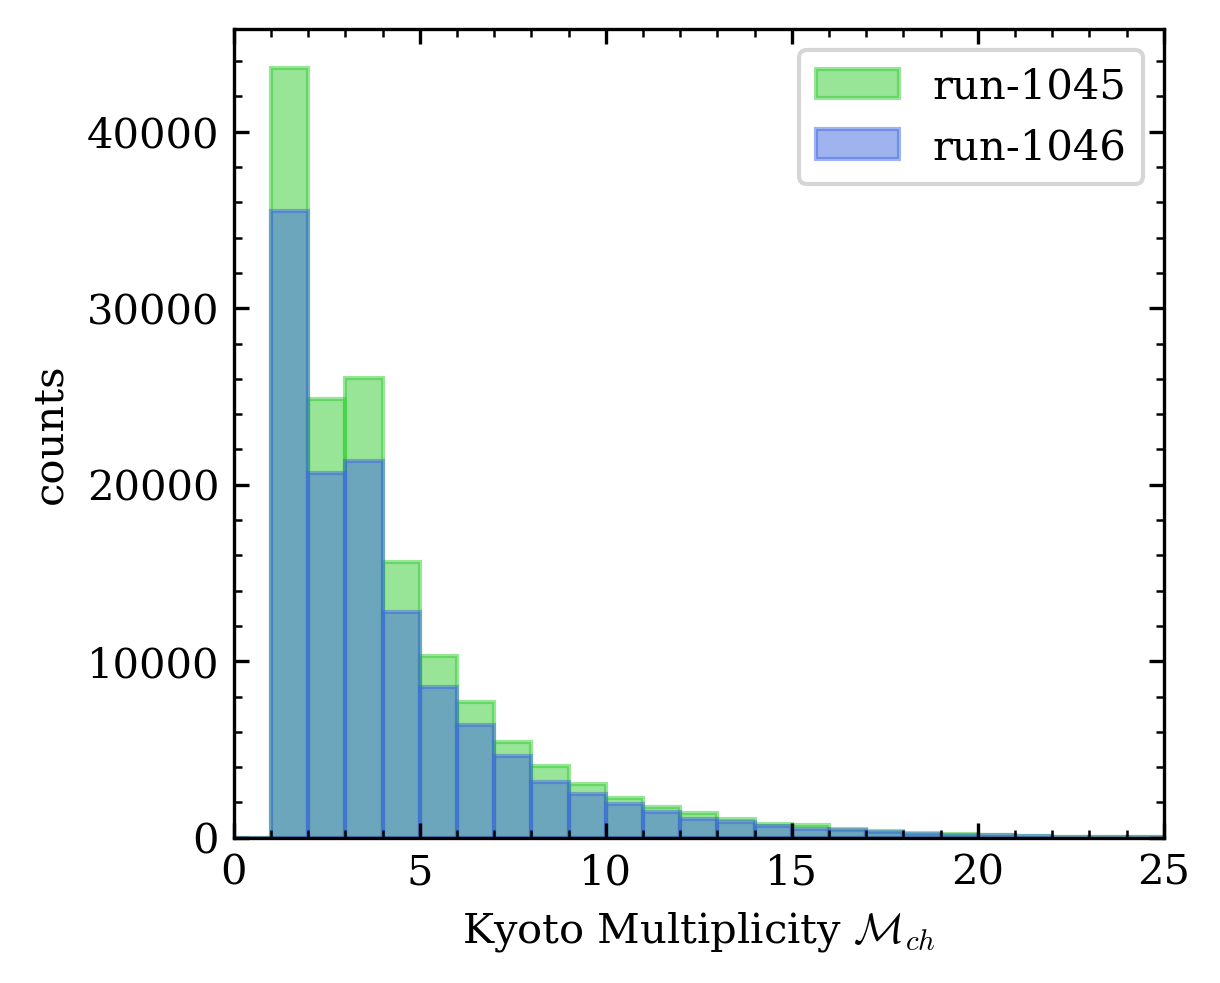

In [ ]:
fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
alphas = [0.5, 0.5]
for i in range(len(df_multi_list)):
    ax.hist(
        df_multi_list[i].x, 
        weights = df_multi_list[i].y, 
        color=colors[i], label=labels[i],
        bins = 30,
        range= (0, 30),
        # histtype='step',
        histtype='bar',
        # histtype='stepfilled',
        # histtype='barstacked',
        alpha=alphas[i],
        edgecolor=colors[i],
    )

ax.legend()
ax.set_xlabel(r'Kyoto Multiplicity $\mathcal{M}_{ch}$')
ax.set_ylabel('counts')
ax.set_xlim(0,25)
